# Assignment 3

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trainData,testData=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
trainX,trainY=trainData
trainX=tf.convert_to_tensor(trainX,dtype=tf.float64)
trainX=trainX/255
testX,testY=testData
testX=tf.convert_to_tensor(testX,dtype=tf.float64)
testX=testX/255

In [4]:
trainX.shape

TensorShape([60000, 28, 28])

In [5]:
values=["Tshirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

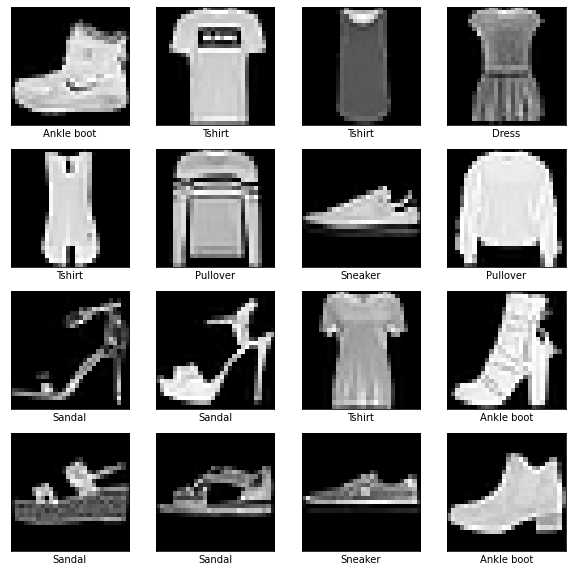

In [6]:
#Some sample images
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(trainX[i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(values[trainY[i]])
plt.show()

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.002),activation="relu"),
    tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(0.002),activation="relu"),
    tf.keras.layers.Dense(32,kernel_regularizer=tf.keras.regularizers.l2(0.002),activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax", name="predictions")
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.024),loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])


In [9]:
history=model.fit(trainX,trainY,validation_split = 0.15,batch_size=128,epochs=16)

Epoch 1/16
399/399 [==============================] - 3s 6ms/step - loss: 2.6044 - accuracy: 0.7136 - val_loss: 2.2988 - val_accuracy: 0.7606
Epoch 2/16
399/399 [==============================] - 2s 6ms/step - loss: 2.1420 - accuracy: 0.8114 - val_loss: 2.0691 - val_accuracy: 0.8173
Epoch 3/16
399/399 [==============================] - 2s 5ms/step - loss: 1.9730 - accuracy: 0.8318 - val_loss: 1.9015 - val_accuracy: 0.8357
Epoch 4/16
399/399 [==============================] - 2s 5ms/step - loss: 1.8442 - accuracy: 0.8417 - val_loss: 1.8057 - val_accuracy: 0.8391
Epoch 5/16
399/399 [==============================] - 2s 5ms/step - loss: 1.7284 - accuracy: 0.8476 - val_loss: 1.6875 - val_accuracy: 0.8484
Epoch 6/16
399/399 [==============================] - 2s 5ms/step - loss: 1.6265 - accuracy: 0.8521 - val_loss: 1.6092 - val_accuracy: 0.8386
Epoch 7/16
399/399 [==============================] - 2s 6ms/step - loss: 1.5333 - accuracy: 0.8570 - val_loss: 1.5079 - val_accuracy: 0.8540
Epoch 

In [10]:
testLoss, testAccuracy = model.evaluate(testX,  testY, verbose=1)

print("\nTesting Data Accuracy:", testAccuracy)
print("Testing Data Loss:", testLoss,"\n")

trainLoss, trainAccuracy = model.evaluate(trainX,  trainY, verbose=1)

print("\nTraining Data Accuracy:", trainAccuracy)
print("Training Data Loss:", trainLoss)

313/313 [==============================] - 0s 1ms/step - loss: 0.9939 - accuracy: 0.8607

Testing Data Accuracy: 0.8607000112533569
Testing Data Loss: 0.9939242005348206 

1875/1875 [==============================] - 3s 2ms/step - loss: 0.9435 - accuracy: 0.8816

Training Data Accuracy: 0.8816499710083008
Training Data Loss: 0.9435285329818726


In [11]:
predictions = model.predict(testX)

In [12]:
yPred=np.array([])
for i in range(len(predictions)):
   yPred=np.append(yPred,np.argmax(predictions[i]))
isCorrect=np.array(yPred!=testY)
wrong=np.sum(isCorrect)


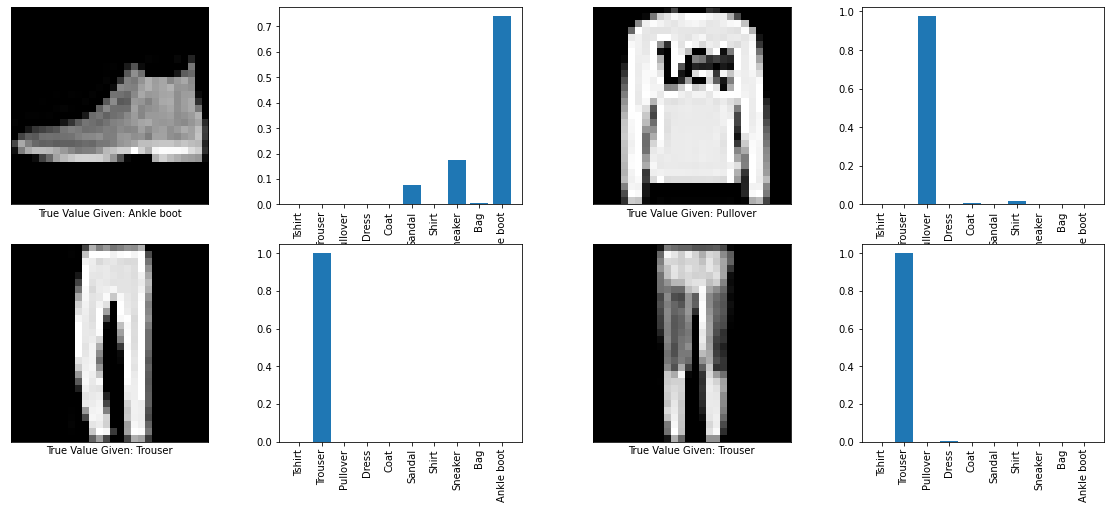

In [13]:
#Some images which are correctly predicted with probability of each outcome
plt.figure(figsize=(20,8))
count=1
for i in range(len(predictions)):
    if(count==9):
        break
    if(isCorrect[i]==True):
        continue
    plt.subplot(2,4,count)
    count+=1
    plt.imshow(testX[i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("True Value Given: "+values[testY[i]])
    # plt.ylabel(values[yPred[i]])
    plt.subplot(2,4,count)
    count+=1
    plt.bar(values,predictions[i])
    plt.xticks(rotation=90)
plt.show()

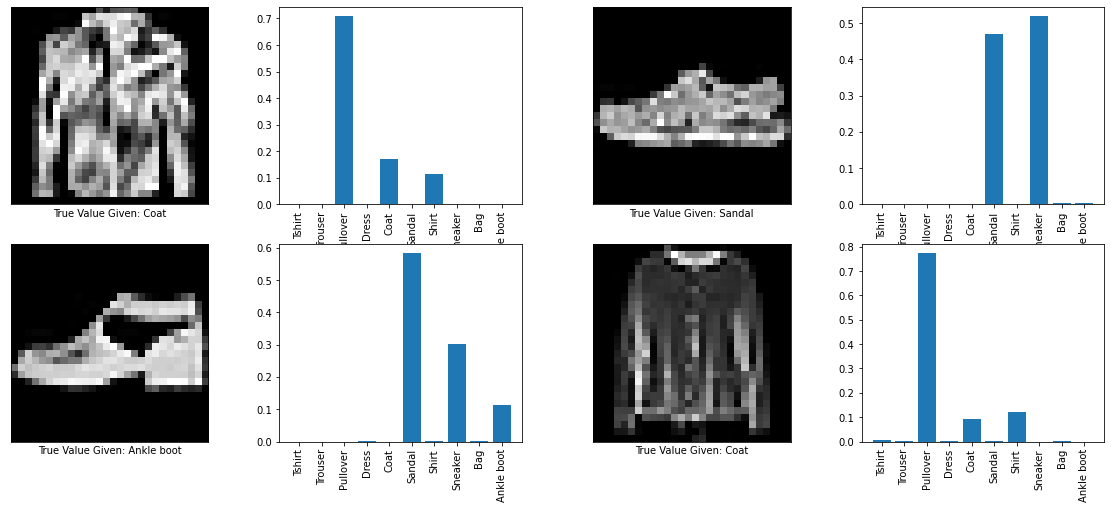

In [14]:
#Some images which are incorrectly predicted with probability of each outcome
plt.figure(figsize=(20,8))
count=1
for i in range(len(predictions)):
    if(count==9):
        break
    if(isCorrect[i]==False):
        continue
    plt.subplot(2,4,count)
    count+=1
    plt.imshow(testX[i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("True Value Given: "+values[testY[i]])
    # plt.ylabel(values[yPred[i]])
    plt.subplot(2,4,count)
    count+=1
    plt.bar(values,predictions[i])
    plt.xticks(rotation=90)
plt.show()

# Analysis
Model has 3 hidden layers with 512,128 and 32 neurons rspectively. For optimization gradient descent is used(SGD), and the loss function is sparse categorical cross entropy. Model trains for 16 epochs with a batch size of 128 and uses l2 regularisation<br>
The statistics are:
>Testing Data Accuracy: 0.8607000112533569<br>
>Testing Data Loss: 0.993924200534820 <br>
>Training Data Accuracy: 0.8816499710083008<br>
>Training Data Loss: 0.9435285329818726<br>

From the accuracy and losses it's clear that model performs pretty well. From the images it is also seen that when model predicts incorrectly then the images are really clumsy for humans to understand as well. So we can consider them as corner cases and thus model performance can be accepted.<br>

The model uses SGD as optimizer which uses modified gradient descent for optimization. The graphs below show the accuracy and losses on training and testing data

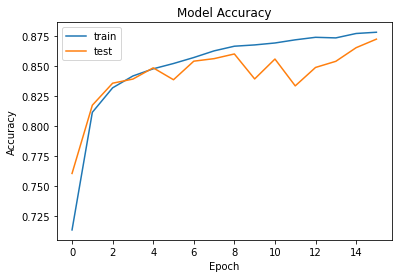

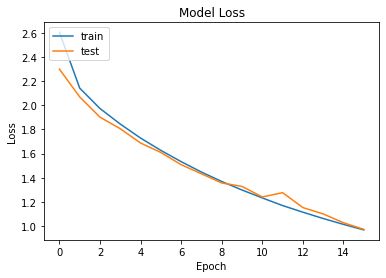

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# References:
+ [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)
+ [https://www.tensorflow.org/tutorials/keras/classification](https://www.tensorflow.org/tutorials/keras/classification)
+ [https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)